In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing
import plotly.express as px #visualization
from plotly.subplots import make_subplots #visualization
from matplotlib import pyplot as plt #visualization
import seaborn as sns #visualization
from sklearn.model_selection import train_test_split #split data
from sklearn.metrics import confusion_matrix #confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve #metrics
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score, classification_report #metrics
from sklearn.model_selection import cross_val_score #cross validation
from sklearn.model_selection import KFold #cross validation by kfold
from sklearn.model_selection import GridSearchCV #find best parameter
from sklearn.ensemble import RandomForestClassifier #ML model
from sklearn.linear_model import LogisticRegression #ML model
from xgboost import XGBClassifier #ML model
from sklearn.tree import DecisionTreeClassifier #ML model
from imblearn.over_sampling import SMOTE #oversample data
from sklearn import preprocessing #label encoding
import warnings
warnings.filterwarnings('ignore')

In [420]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [421]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [422]:
#Borramos las columnas que no son necesarias
data.drop(data[data.gender == 'Other'].index, inplace=True)
data.drop(data[data.work_type == 'Never_worked'].index, inplace=True)
data.drop(data[data.work_type == 'children'].index, inplace=True)
data.drop(data[data.smoking_status == 'Unknown'].index, inplace=True)
data.drop('id', axis=1, inplace=True)

#Columnas que convertiremos a categoria
cols = ['gender', 'ever_married', 'work_type','Residence_type','smoking_status']
#Convertimos las columnas a tipo category
data[cols] = data[cols].astype('category')
#Convertimos la columna 'edad' a int
data['age'] = data['age'].astype('int')

In [411]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [59]:
#chequeamos si hay valores nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3482 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             3482 non-null   category
 1   age                3482 non-null   int64   
 2   hypertension       3482 non-null   int64   
 3   heart_disease      3482 non-null   int64   
 4   ever_married       3482 non-null   category
 5   work_type          3482 non-null   category
 6   Residence_type     3482 non-null   category
 7   avg_glucose_level  3482 non-null   float64 
 8   bmi                3343 non-null   float64 
 9   smoking_status     3482 non-null   category
 10  stroke             3482 non-null   int64   
dtypes: category(5), float64(2), int64(4)
memory usage: 208.0 KB


In [423]:
#rellenamos la columna 'bmi'
data['bmi'].fillna((data['bmi'].mean()), inplace=True)
data.isnull().mean()

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

In [426]:
#convertimos las variables categoricas a numericas
columns_obj = ["gender", "ever_married" ,"Residence_type"]
encoding = preprocessing.LabelEncoder()
for col in columns_obj:
    data[col]=  encoding.fit_transform(data[col])
#convert in 0 and 1 the rest of columns
data = pd.get_dummies(data)
data.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67,0,1,1,1,228.69,36.60000,1,0,1,0,1,0,0
1,0,61,0,0,1,0,202.21,30.45163,1,0,0,1,0,1,0
2,1,80,0,1,1,0,105.92,32.50000,1,0,1,0,0,1,0
3,0,49,0,0,1,1,171.23,34.40000,1,0,1,0,0,0,1
4,0,79,1,0,1,0,174.12,24.00000,1,0,0,1,0,1,0


In [427]:
#Definimos variable dependiente e independientes
X = data.drop(columns = ['stroke'])
#target
y = data['stroke']

In [428]:
#balanceamos el dataset
smote = SMOTE(random_state=42)
X , y = smote.fit_resample(X,y)

data.stroke.value_counts(normalize=True)
y.value_counts(normalize=True)

1    0.5
0    0.5
Name: stroke, dtype: float64

In [429]:
#Separamos los datos de entrenamiento y prueba.
#Utilizaremos el 80% para entrenamiento y el 20% restante para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5248, 14) (1312, 14) (5248,) (1312,)


In [430]:
#redondeamos decimales
X_train = round(X_train, 2)
X_test = round(X_test, 2)


In [431]:
#function to eliminate outliers base in Zscore
def Zscore_outlier(df):
    out=[]
    m = np.mean(df)
    sd = np.std(df)
    for i in df:
        z = (i-m)/sd
        if np.abs(z) > 3:
            out.append(i)
    out.sort()
    print(out)
Zscore_outlier(X_train['bmi'])
Zscore_outlier(X_train['avg_glucose_level'])

[11.5, 49.2, 49.21, 49.3, 49.3, 49.4, 49.5, 49.63, 49.8, 49.8, 49.8, 49.9, 50.1, 50.2, 50.2, 50.3, 50.4, 50.41, 50.9, 51.0, 51.7, 51.84, 52.8, 52.8, 52.9, 53.4, 53.5, 54.0, 54.1, 54.3, 54.6, 54.6, 54.65, 54.7, 54.7, 54.7, 55.0, 55.1, 55.2, 55.7, 55.7, 55.75, 55.9, 56.0, 56.1, 56.6, 56.6, 57.2, 57.5, 57.7, 57.9, 58.1, 59.7, 60.2, 64.4, 64.8, 71.9, 78.0, 92.0]
[]


In [432]:
#change outliers value to approximate maximum
X_train.loc[X_train.bmi >= 53.4, 'bmi'] = 49

In [71]:
xgb = XGBClassifier(objective='binary:logistic')

#PARAMETROS XGBOOST
params = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05],
    'min_child_weight':[4,5,6],
     'gamma': [0,10],
    'subsample': (0.50, 1),
    'colsample_bytree': (0.5, 1.)
}

#Inicializamos en grid search
#grid = GridSearchCV(xgb, params, scoring = 'roc_auc' ,cv=5)
#entrenamos el gridsearch
#grid.fit(X_train, y_train)
#Imprimimos el modelo
#grid.best_estimator_

In [433]:
best_xgb = XGBClassifier(objective='binary:logistic',learning_rate = 0.1, max_depth = 8, n_estimators =180, gamma=0)
best_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=180, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [434]:
p = best_xgb.score(X_train,y_train)
print('train acc: %5f' % p)

y_pred = best_xgb.predict(X_test)

print('test acc: %5f' % best_xgb.score(X_test,y_test))

train acc: 0.999428
test acc: 0.959604


In [74]:
scores = cross_val_score(best_xgb, X_train, y_train, cv=5, scoring="accuracy")

print(scores.mean(),round(scores.std()*100,2))

0.9550305506377956 0.31


In [435]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       654
           1       0.96      0.96      0.96       658

    accuracy                           0.96      1312
   macro avg       0.96      0.96      0.96      1312
weighted avg       0.96      0.96      0.96      1312

[[630  24]
 [ 29 629]]


In [438]:
feature_important=pd.Series(best_xgb.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_important

work_type_Self-employed           0.203914
work_type_Govt_job                0.200795
smoking_status_smokes             0.147603
smoking_status_formerly smoked    0.100271
work_type_Private                 0.077466
age                               0.070951
smoking_status_never smoked       0.068388
ever_married                      0.026877
gender                            0.026626
Residence_type                    0.023815
avg_glucose_level                 0.016242
heart_disease                     0.015168
bmi                               0.013042
hypertension                      0.008841
dtype: float32

<Axes: >

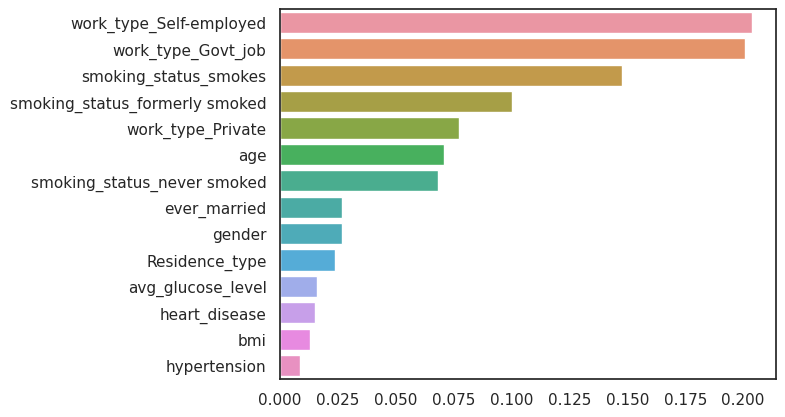

In [439]:
sns.barplot(x=feature_important,y=feature_important.index)

In [443]:
probabilidades = best_xgb.predict_proba(X_test)

probabilidades=probabilidades[:, 1]

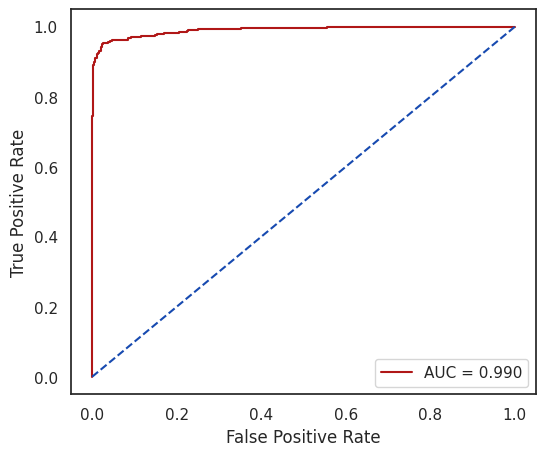

In [444]:
# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probabilidades)
from sklearn import metrics

roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 5))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


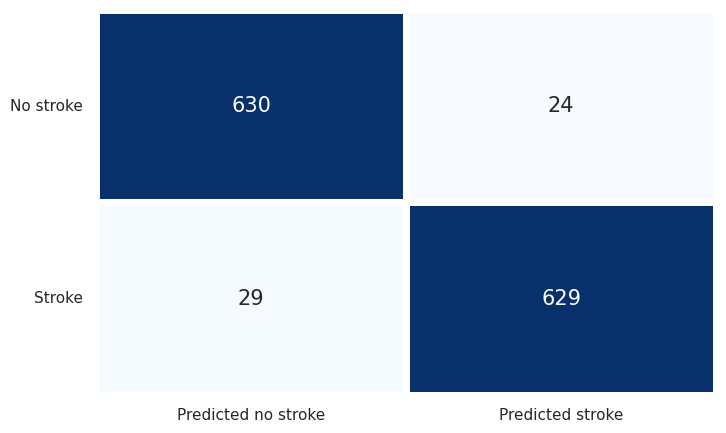

In [456]:
xgb_cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (8, 5))
sns.heatmap(xgb_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
           yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

In [446]:
# Feature importance
f_imp3 = pd.DataFrame(columns = ['feature', 'importance'], index = range(14))
for i in range(len(f_imp3.index)):
    f_imp3.iloc[i, 0] = X_train.columns.to_list()[i]
f_imp3['importance'] = best_xgb.feature_importances_
f_imp3 = f_imp3.sort_values('importance', ascending = False)
f_imp3[0:12].style.background_gradient(cmap = 'Blues')

,feature,importance
10,work_type_Self-employed,0.203914
8,work_type_Govt_job,0.200795
13,smoking_status_smokes,0.147603
11,smoking_status_formerly smoked,0.100271
9,work_type_Private,0.077466
1,age,0.070951
12,smoking_status_never smoked,0.068388
4,ever_married,0.026877
0,gender,0.026626
5,Residence_type,0.023815


In [89]:
pip install -U shap

In [90]:
import shap


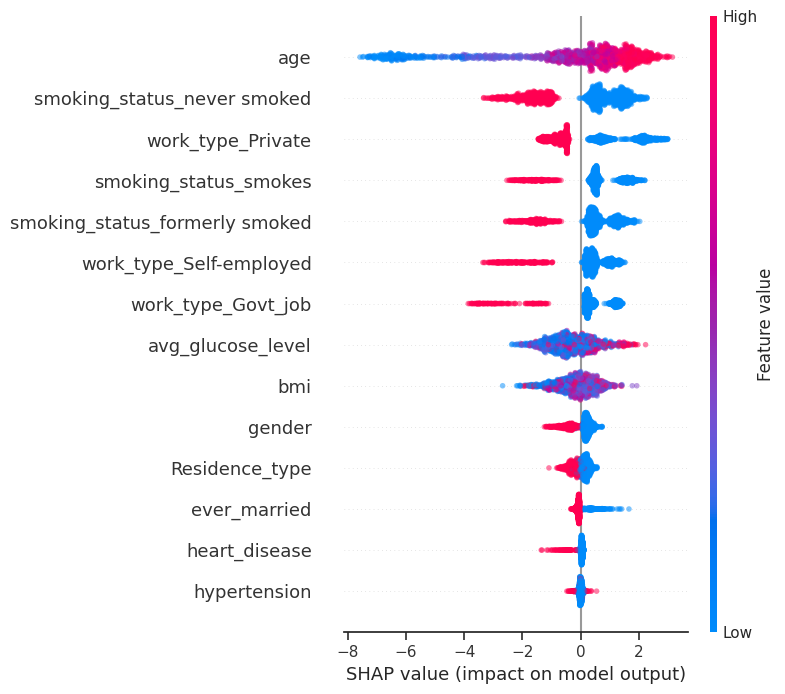

In [448]:
explainer = shap.Explainer(best_xgb)
# calculate shap values. This is what we will plot.
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, alpha=0.5)

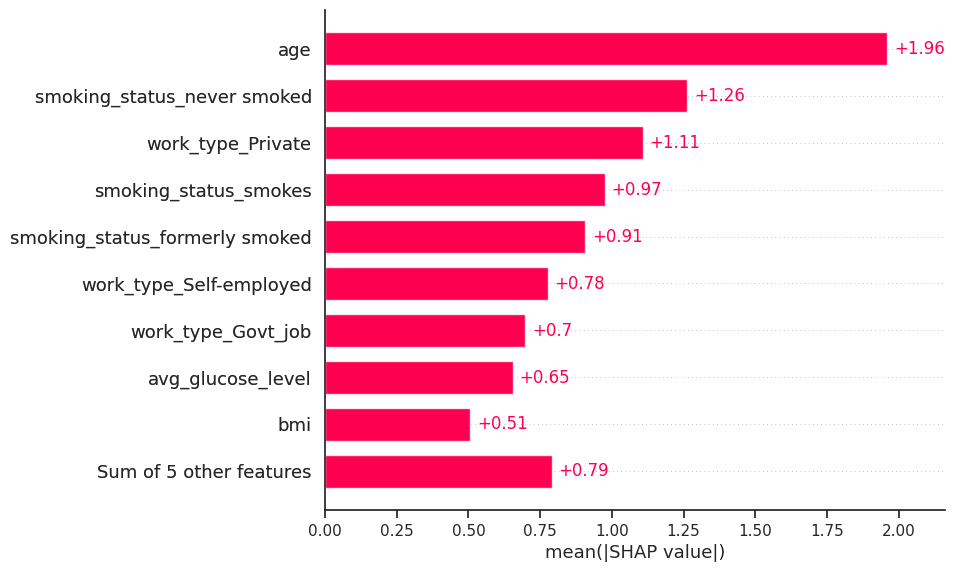

In [449]:
shap.initjs()
shap.plots.bar(shap_values)

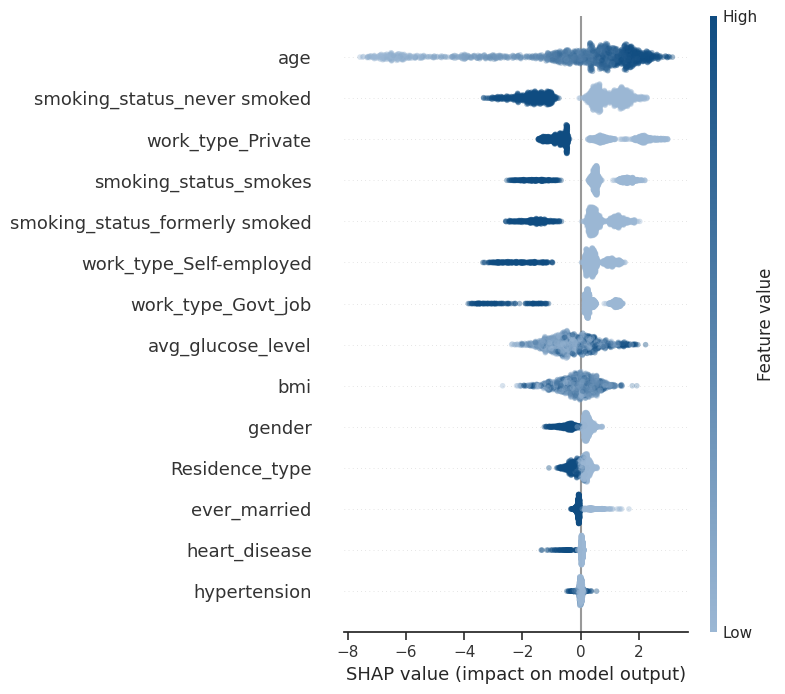

In [92]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec

colors = ["#9bb7d4", "#0f4c81"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
shap.summary_plot(shap_values, X_test,cmap=cmap,alpha=0.4)

In [93]:
#Importamos pickle para poder guardar el modelo
import pickle

In [96]:
model_loaded = pickle.load(open(filename, 'rb'))

In [453]:
with open('categories_ohe.pickle', 'wb') as handle:
	pickle.dump(X.columns, handle, protocol=pickle.HIGHEST_PROTOCOL)